# Lab: Basic Signal Processing - Solution

Now that you are all understand sine wave, let's get started the lab.

<u>Objective</u>
1. To get you familiar with basic of signal
2. To play with the fundamental/theory of signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Task 1

Create a 5-cycle 5Hz sine wave using a sampling rate of 100 Hz. Plot the result with appropriate axis.

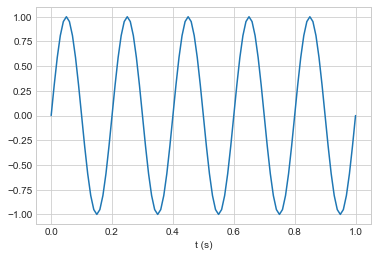

In [2]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x1 = np.sin(2 * np.pi * 5 * t + 0)

plt.plot(t,x1)
plt.xlabel('t (s)')
plt.show()


## Task 2

Create another 3-cycle of 5Hz sine wave using a sampling rate of 100 Hz.

Perform an addition with the 5-cycle sine wave from task 1.

Plot the result.

*Hint: The array size of 3-cycle and 5-cycle is not equal. You may need to extend the array size of 3-cycle with zeros.*

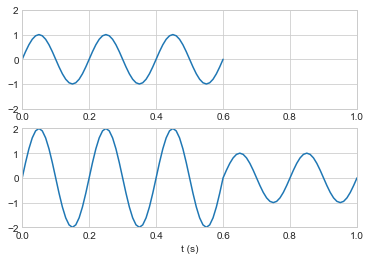

In [3]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=0.6 + 1/fs, step=1/fs)
x2 = np.sin(2 * np.pi * 5 * t + 0)


fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(t,x2)
ax[0].set_xlim(0,1)
ax[0].set_ylim(-2,2)
# Because x1 has 101 data point, append 40 zeros at the end of x2.
x2 = np.hstack([x2, np.zeros(40)])
# Recreate t with range of 0 - 1 second to plot the second
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
ax[1].plot(t,x1 + x2)
ax[1].set_xlim(0,1)
ax[1].set_ylim(-2,2)

ax[1].set_xlabel('t (s)')
plt.show()


## Task 3

Create the same 5-cycle 5 Hz sine wave using a sampling rate of 100 Hz (like task 1) but this time, it has a phase of 180 degree.

Like Task 2, perform an addition between task-1 sine wave and task-3 sine wave.

Plot the result.

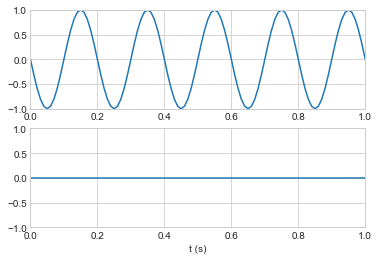

In [4]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x3 = np.sin(2 * np.pi * 5 * t + np.deg2rad(180))

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(t,x3)
ax[0].set_xlim(0,1)
ax[0].set_ylim(-1,1)

ax[1].plot(t,x1 + x3)
ax[1].set_xlim(0,1)
ax[1].set_ylim(-1,1)

ax[1].set_xlabel('t (s)')
plt.show()


## Task 4

Explain what happen in the last 3 tasks.

*Hint: Wave interference*

When the two waves are joined together (addition), they combine into one wave. The joining process is called `wave inference`. The procedure is simple, for every data point *i* where *i* is an index of an array, perform an addition on x1[i] and x2[i].

The equation is as below.
$$ x_{join}[i] = x_1[i] + x_2[i] $$

For every data point *i*, there are two posible outcome, either `constructive` or `destructive`. When the phase of the two waves are in sync (either both positive and negative), we get `constructive inference`. When they are out of sync (one is positive and another is negative), we get `destructive inference`.

On the task 2, we have perfectly in sync inference, that is why the first 3 cycle has twice the amplitude.

On the task 3, we have perfectly out of sync inference, the result is destructive and result in no wave.

Fun fact, the `destructive inference` may known by the another name, `phase cancellation`.

## Task 5

Create a 0 Hz sine wave using a sampling rate of 100 Hz.

Plot the result.

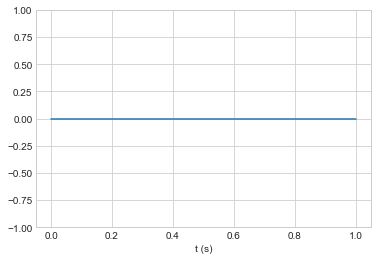

In [5]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x5 = np.sin(2 * np.pi * 0 * t + 0)

plt.plot(t,x5)
plt.ylim(-1,1)
plt.xlabel('t (s)')
plt.show()


## Task 6

What is 0 Hz sine wave?

Remember the electric class? There are two types of current, `alternate` (AC) and `direct` (DC). In AC, the current switch from positive value to negative value while the DC stay fix at a constant value.

Well, the 0 Hz sine wave is sometime called, DC component.

## Task 7

Add 5 to the task-1 sine wave.

Plot the result.

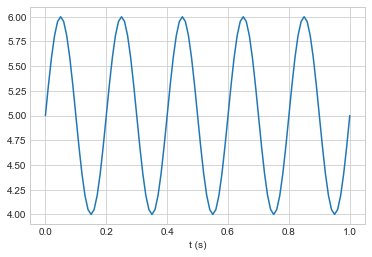

In [6]:
# Answer
plt.plot(t,x1 + 5)
plt.xlabel('t (s)')
plt.show()

## Task 8

What is `5`?

`5` is the DC component. You can see it as 0 Hz sine wave with the constant value of 5.

As you can see, the result is the same 5-cycle sine wave but move up 5 steps along the y-axis. Hence, the DC component may also call DC bias or DC offset.

Fun fact, you can easily find DC component in any signal by finding its mean.

## Task 9

Create a 95 Hz sine wave using a sampling rate of 100 Hz. The range of the sampling is 1 second.

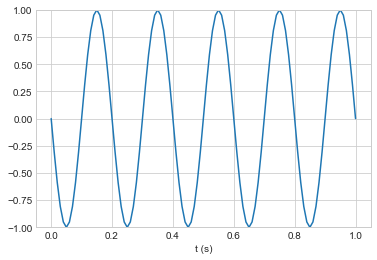

In [7]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x8 = np.sin(2 * np.pi * 95 * t + 0)

plt.plot(t,x8)
plt.ylim(-1,1)
plt.xlabel('t (s)')
plt.show()


## Task 10

Create a 105 Hz sine wave using a sampling rate of 100 Hz. The range of the sampling is 1 second.

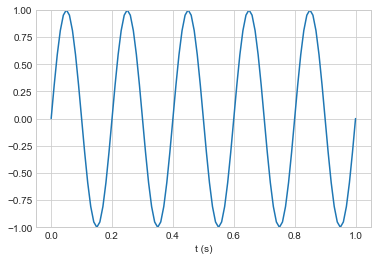

In [8]:
# Answer
fs = 100 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x9 = np.sin(2 * np.pi * 105 * t + 0)

plt.plot(t,x9)
plt.ylim(-1,1)
plt.xlabel('t (s)')
plt.show()


## Task 11

Explain Task 9 and 10.

*Hint: signal aliasing*

[quote](https://en.wikipedia.org/wiki/Aliasing)

![alt](https://upload.wikimedia.org/wikipedia/commons/8/83/FFT_aliasing_600.gif)

The effect we saw is call `aliasing`. During the recording (sampling), one signal look like another signal due to the insufficient sampling rate.

Because, no matter what, with a sampling rate of 100 Hz, we will always obtain a record in a range from 0 Hz to 50 Hz (fs/2). The key word is `no matter what`. This is also called `bandwidth`, which is the width of the frequency band we can have given a sampling rate.

In video, this sampling rate error may know by the name `Wagon-wheel effect` which is a form of temporal alias.

![alt](https://i.gifer.com/8P51.gif)

Imagine you are recording an analog clock. The clock has second hand that tick every second. If your camera shoot at 60 second intervals, every frames the second hand will be at the exact place. If your camera shoot at 59 second intervals, the second hand will appear at 1 second earlier every frame. When playback, it will create an illusion of moving backward. If your camera shoot at 61 second, the second hand will appear at the next second of the last frame. When playback, the second hand will appear to move regularly. 

The clock phenomenon is occurred because of the temporal alias, but we adjust the sampling rate.

In the last 2 tasks, we fixed the sampling rate and change the frequency of the object instead.

As we see, task 9 we get 5 Hz sine wave with a phase of 180 degree (phase flip) and, task 10, we get a perfect 5 Hz sine wave.

Phase flip is the same as the object is rotating backward.

Why is this important? 

Imagine you are recording a sound, probably a guitar playing. What do you think you get? What is the range of the frequency you are recording? 

We, human, only hear up to 20,000 Hz but in nature, are there any sound higher than that? Of course there is. Thus, when we record something, we have to limit the range of the input frequency (band limit) otherwise we get aliasing in the record.

Fortunately, normally, every recording device has handled this issue. Thus, we, the user, can record/sampling with peace.

## Task 12

The code below is a function to generate any list/array into a `.wav` file which you can listen to.

This task is easy, run the code and open the `440Hz.wav` and listen to the 440Hz sound.

In [ ]:
#!/usr/bin/python 
# based on : www.daniweb.com/code/snippet263775.html
import wave
import struct

def save_wav(audio, file_name, fs=8000):
    # Open up a wav file
    wav_file=wave.open(file_name,"w")

    # wav params
    nchannels = 1
    sampwidth = 2
    # 44100 is the industry standard sample rate - CD quality.  If you need to
    # save on file size you can adjust it downwards. The stanard for low quality
    # is 8000 or 8kHz.
    nframes = len(audio)
    comptype = "NONE"
    compname = "not compressed"
    wav_file.setparams((nchannels, sampwidth, fs, nframes, comptype, compname))

    # WAV files here are using short, 16 bit, signed integers for the 
    # sample size.  So we multiply the floating point data we have by 32767, the
    # maximum value for a short integer.  NOTE: It is theortically possible to
    # use the floating point -1.0 to 1.0 data directly in a WAV file but not
    # obvious how to do that using the wave module in python.
    for sample in audio:
        wav_file.writeframes(struct.pack('h', int( sample * 32767.0 )))
    wav_file.close()
    return

In [10]:
fs = 8000 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 440 * t + 0)

save_wav(x, './sound/sine_440hz.wav',fs=fs)

## Task 13

Now, use the lecture file as a guide to create a 440Hz of triangle wave for 1 second with sampling rate of 8000 Hz.

Plot the triangle, create a wav file and listen to it. (be careful with the amplitude, make sure you are not exceeding 1)

*Tip: When plot, use plt.xlim(0, 10/440) to zoom into the first 10 triangles.*

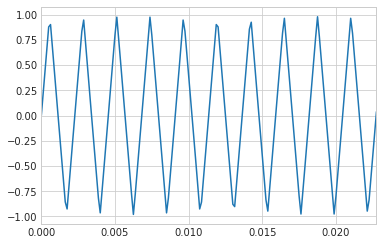

In [11]:
# Answer
fs = 8000 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x = np.zeros(len(t))
for i in np.arange(0,10,1):
    n = (2*i) + 1
    x += ((-1)**i)  * (1/(n**2)) * np.sin(2 * np.pi * t * 440 * n)
x =  8 * x / np.pi**2
plt.plot(t, x)
plt.xlim(0,  10 / 440)
plt.show()
save_wav(x, './sound/triangle_440hz.wav',fs=fs)

## Task 14

Repeat the task 13, but, this time, create a square wave.

Be careful with the frequency of the harmonic, make sure it does not exceed the fs/2

Limit the peak of the square to 0.2. It is quite loud.

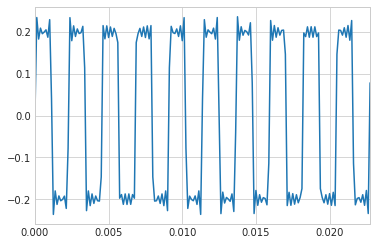

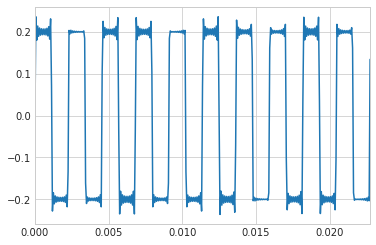

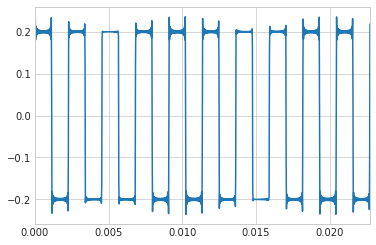

In [12]:
# Answer
for fs in [8000,16000,44100]:
    t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
    x = np.zeros(len(t))
    for i in np.arange(1,500,2):
        if(440 * i > fs/2): break
        x += 4/(np.pi*i) * np.sin(2 * np.pi * t * 440 * i)
    x = x * 0.2
    plt.plot(t, x)
    plt.xlim(0,  10 / 440)
    plt.show()
    save_wav(x, f'./sound/square_440hz_{fs}.wav',fs=fs)

## Task 15

Finally, we can kind of mimic the square wave by limit the peak of the sine wave.

Create a 440 Hz sine wave with a sampling rate of 8000 Hz (just like Task 12).

Then, limit the amplitude to $\pm$ 0.2.

Does it sound like the square wave we create earlier?

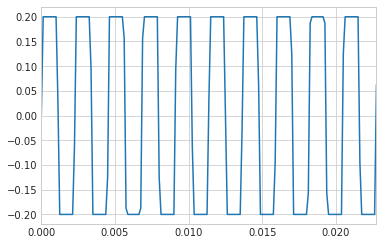

In [17]:
fs = 8000 #Hz
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 440 * t + 0)
x[x > 0.2] = 0.2
x[x < -0.2] = -0.2
plt.plot(t, x)
plt.xlim(0,  10 / 440)
plt.show()

save_wav(x, './sound/square_from_sine_440hz.wav',fs=fs)